# Project Description and Objectives
The purpose of the project is to analyze fitness club customer questionnaires and then prepare an action plan for customer retention.


At the end of the project the following tasks should be accomplished:

    1. identify target groups of clients;
    2. suggest measures to reduce churn;
    3. identify other features of customer interaction.

The project includes the following steps:

    1. exploratory data analysis;
    2. creation of a model for predicting customer churn;
    3. clustering of customers;
    4. conclusions and recommendations.

# Data upload and pre-processing

In [30]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [31]:
# creating the dataframe

df = pd.read_csv('gym_churn.csv')

In [32]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [35]:
# setting the column names to lower case 

df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

# EDA

## Data description

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [37]:
# checking for duplicates

df.duplicated().sum()

0

There are 4000 records in df, data types are specified correctly, there are no missing values and no duplicates.

In [38]:
# dataframe description

df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Based on the description we can see that:

1. Almost 85% of customers live close to the club.
2. Almost half of the clients (49%) are employees of the club's partner company.
3. Approx. 30% signed up as part of a "bring a friend" promotion
4. Approx. 40% of clients go to group classes.
5. The average age of clients is 29 years old, the youngest users are 18 years old and the oldest are 41 years old.
6. Average frequency of visits per week is about 2 visits.
7. Average customer lifetime - approx. 4 months.
8. Current average churn rate - 27%.

In [39]:
# average values of customer features for groups with and without churn
grouped_by_churn = df.groupby('churn').mean().round(2).T
grouped_by_churn

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


In the breakdown by churn, it can be noted that:

1. There is no difference between men and women;
2. Churn is slightly higher among those who live far away from the club (87% vs 77%)
3. Churn is higher among the employees of the club's partner company (53% vs 36%).
4. Churn rate is higher among those who came under the "bring a friend" campaign (35% vs 18%)
5. Churn rate is higher among those who do not go to group classes (46% vs 27%).

## Feature distributions

In [11]:
# columns with categorical variables

categorical_cols = ['gender', 'near_location', 'partner', 'promo_friends', \
                    'phone', 'contract_period', 'group_visits']

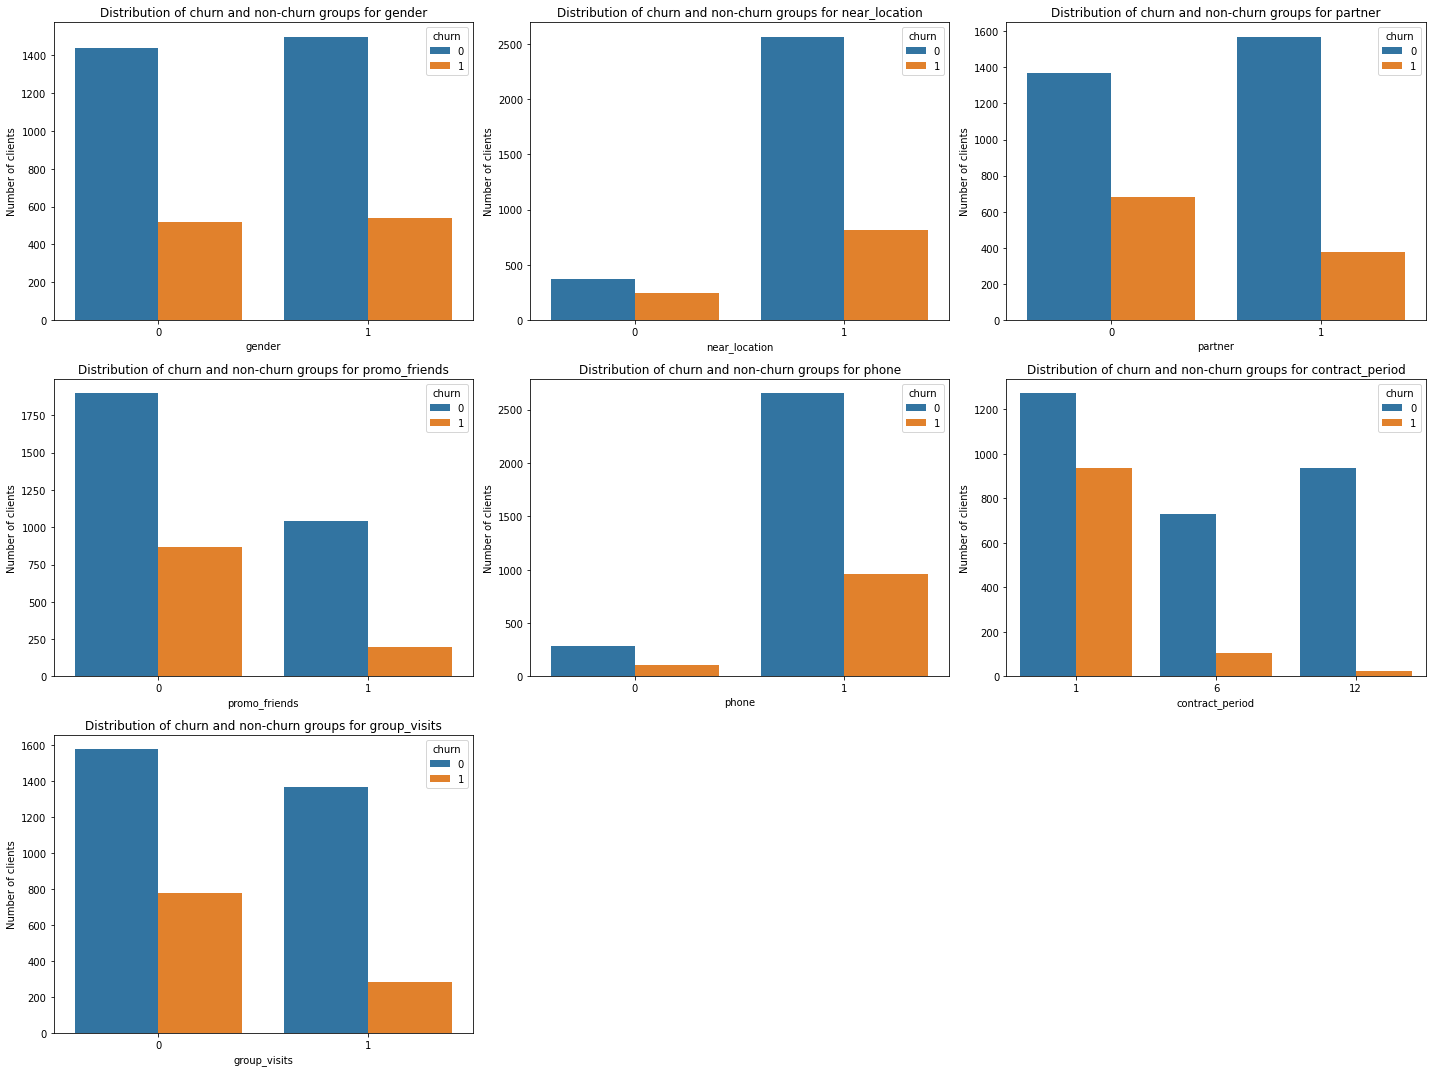

In [40]:
# plotting categorical variables for churn and non-churn groups

plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=df, x=col, hue ='churn',
        ax=plt.subplot(3, 3, i + 1),
    )
    
    plt.ylabel('Number of clients')
    plt.title(f'Distribution of churn and non-churn groups for {col}')

plt.tight_layout() 
plt.show()

In [41]:
# columns with quantitative variables
quantitative_cols = ['age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month']

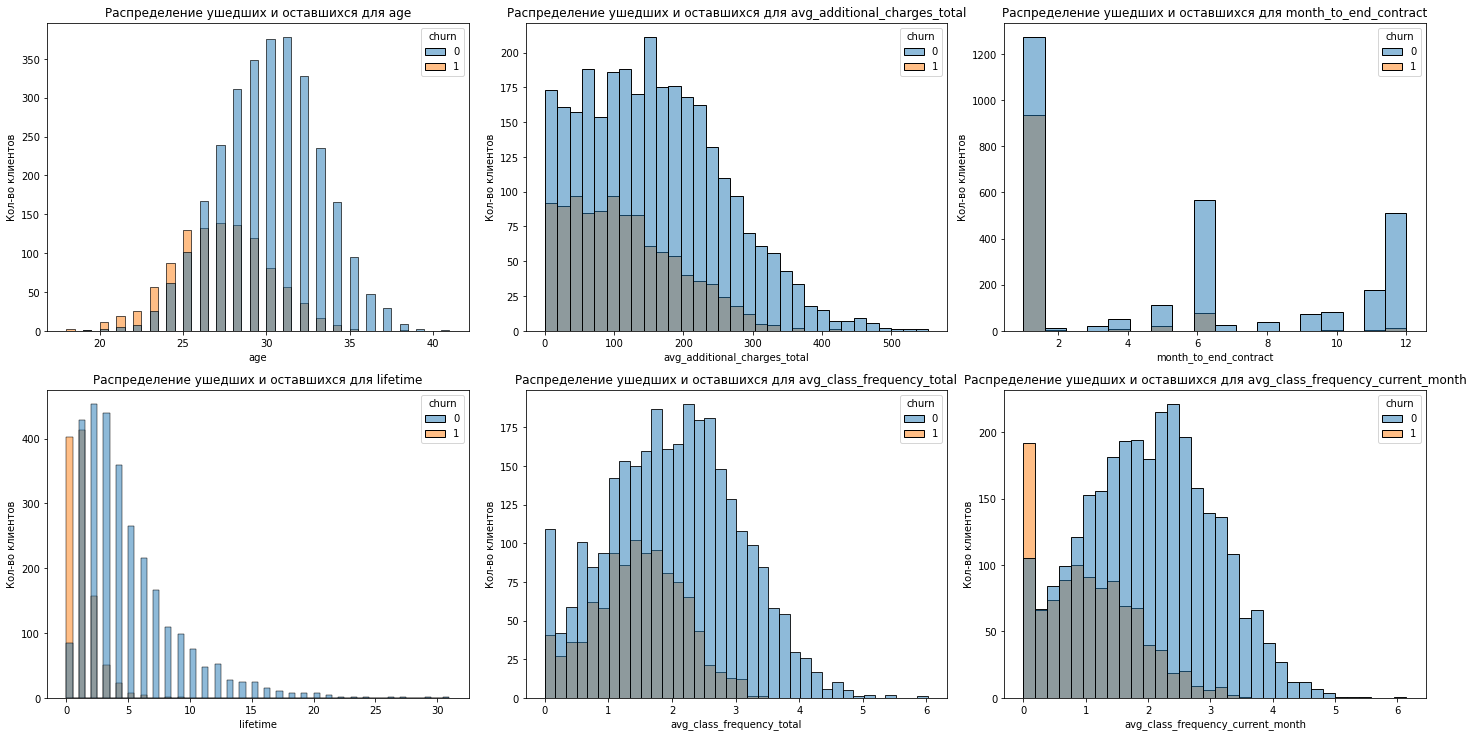

In [42]:
# plotting quantitative variables for churn and non-churn groups
plt.figure(figsize=(20, 15))

for i, col in enumerate(quantitative_cols):
    sns.histplot(
        data=df, x=col, hue ='churn',
        ax=plt.subplot(3, 3, i + 1),
    )
    
    plt.ylabel('Кол-во клиентов')
    plt.title(f'Распределение ушедших и оставшихся для {col}')

plt.tight_layout() 
plt.show()

Based on the presented distributions, it can be assumed that churn can be related to the remoteness of the client's residence from the club, non-attendance of group classes, low activity in the current month, whether the person came to the club by promotion, whether he/she is an employee of the partner company.

## Correlation matrix and heatmap

In [43]:
# Correlation matrix
corr_m = df.corr(method='spearman')
corr_m

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.001490,0.017879,0.008154,-0.001921,0.000489,0.006951,0.015634,0.009612,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.148445,0.154728,0.051882,0.045524,0.144131,0.080193,0.046430,0.065176,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.309500,0.022710,0.050663,0.020923,0.301528,0.101645,0.023851,0.045258,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.247377,0.120170,0.049558,0.042656,0.242336,0.101643,0.028184,0.055250,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.008906,-0.010099,-0.008107,0.006713,-0.010445,-0.006466,0.007003,0.012735,-0.001177
contract_period,0.001490,0.148445,0.309500,0.247377,-0.008906,1.000000,0.168623,0.138429,0.109275,0.985563,0.234406,0.101248,0.167457,-0.402096
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.168623,1.000000,0.077069,0.029033,0.165204,0.088342,0.055617,0.074669,-0.175325
age,0.008154,0.051882,0.050663,0.049558,-0.008107,0.138429,0.077069,1.000000,0.074325,0.133837,0.223819,0.114998,0.180330,-0.401664
avg_additional_charges_total,-0.001921,0.045524,0.020923,0.042656,0.006713,0.109275,0.029033,0.074325,1.000000,0.111858,0.104981,0.040042,0.073928,-0.191432
month_to_end_contract,0.000489,0.144131,0.301528,0.242336,-0.010445,0.985563,0.165204,0.133837,0.111858,1.000000,0.228381,0.095044,0.160631,-0.397513


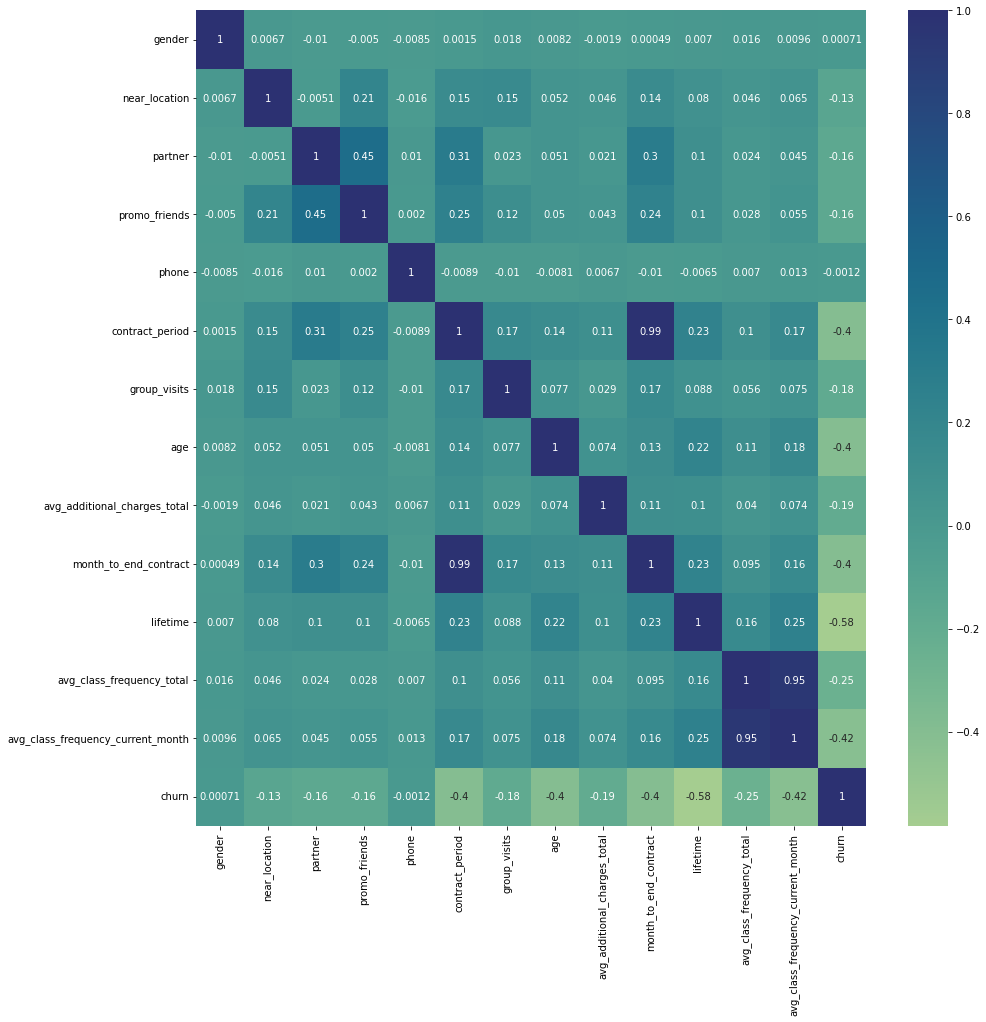

In [44]:
# heatmap based on correlation matrix

plt.figure(figsize=(15,15))
sns.heatmap(corr_m, annot=True, cmap="crest")
plt.show()

There is moderate negative correlation between Lifetime and churn (-0.58). 

There is also weak negative correlation (-0.4) with churn for such criteria as season ticket duration, age, period until the end of the current valid season ticket and average number of visits for the current month.

# Customer churn forecasting model

In [45]:
# splitting the data into attributes (matrix X) and target variable (y)
X = df.drop('churn', axis=1)
y = df['churn']

# training and validation samples
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

## Logistic regression

In [48]:
# setting the algorithm
lr_model = LogisticRegression(random_state=0, solver='liblinear')

# training the model
lr_model.fit(X_train, y_train)

# using the model to make a forecast
lr_predictions = lr_model.predict(X_test)

## Random forest

In [53]:
# training StandartScaler using training sample
scaler = StandardScaler()
scaler.fit(X_train)

# transforming the training and test samples
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# algorithm for the model based on the random forest algorithm
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# train the random forest model
rf_model.fit(X_train_st, y_train)

# using the rf model to make a forecast
rf_predictions = rf_model.predict(X_test_st)

In [54]:
# function that will display the metrics

def print_metrics(y_true, predictions, title='Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, predictions)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, predictions)))
    print('\tF1-score: {:.2f}'.format(f1_score(y_test, predictions)))

In [56]:
print_metrics(y_test, lr_predictions, title='Metrics for the logistic regression model:')

Metrics for the logistic regression model:
	Accuracy: 0.92
	Precision: 0.86
	Recall: 0.84
	F1-score: 0.85


In [57]:
print_metrics(y_test, rf_predictions, title='Metrics for the random forest model:')


Metrics for the random forest model:
	Accuracy: 0.90
	Precision: 0.85
	Recall: 0.76
	F1-score: 0.80


The values of metrics for both models are very close, but logistic regression showed the best results.

# Customer clustering

In [58]:
# data for clustering
x = df.drop('churn', axis = 1)

# standardization of data before working with algorithms
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [61]:
# a table of distances between objects
linked = linkage(x_sc, method = 'ward')

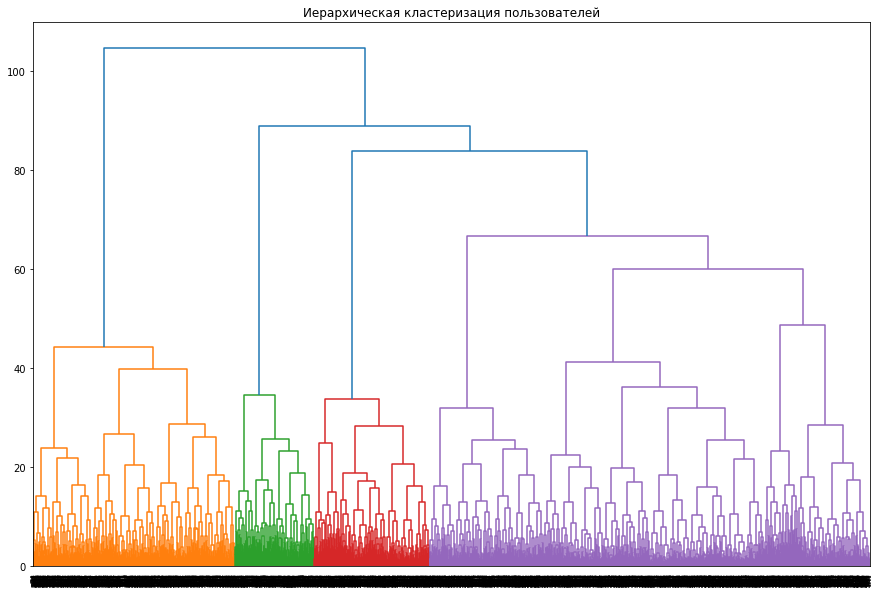

In [25]:
# visualizing the dendrogram

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация пользователей')
plt.show()

The proposed optimal number of clusters is 4, with the largest cluster in purple color. Let us further use the K-Means algorithm to predict the clusters of clients. We take n=5 as the number of clusters.

In [62]:
# k_means model with 5 clusters
km = KMeans(n_clusters=5, random_state=0)

# predict clusters for observations 
labels = km.fit_predict(x_sc)

In [63]:
# save the cluster labels in the dataset
df['cluster_km'] = labels

# statistics on the mean values of the attributes by cluster
df.groupby('cluster_km').agg('mean').round(2).T

cluster_km,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.89,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.76,143.96,135.46,131.62,161.66
month_to_end_contract,9.95,4.48,2.20,1.86,2.46


Based on the clusters, the following can be noted: 
- the lowest churn rate is in clusters 0 and 4. Both of these clusters are characterized by customers living near the club, aged around 30 years old and with a lifetime of approx. 5 months, who have attended between 2 and 3 training sessions in the past month, and who go to the club with the same frequency. At the same time, in cluster 0 there are more clients who came through the affiliate program or "bring a friend" promotion and longer contracts.
- The highest churn rate is in cluster 3. This cluster also includes customers living close to the club aged around 30, but they are much less likely to go to group classes and have the shortest contracts, the lowest lifetime, and attend only 1 training session per month.

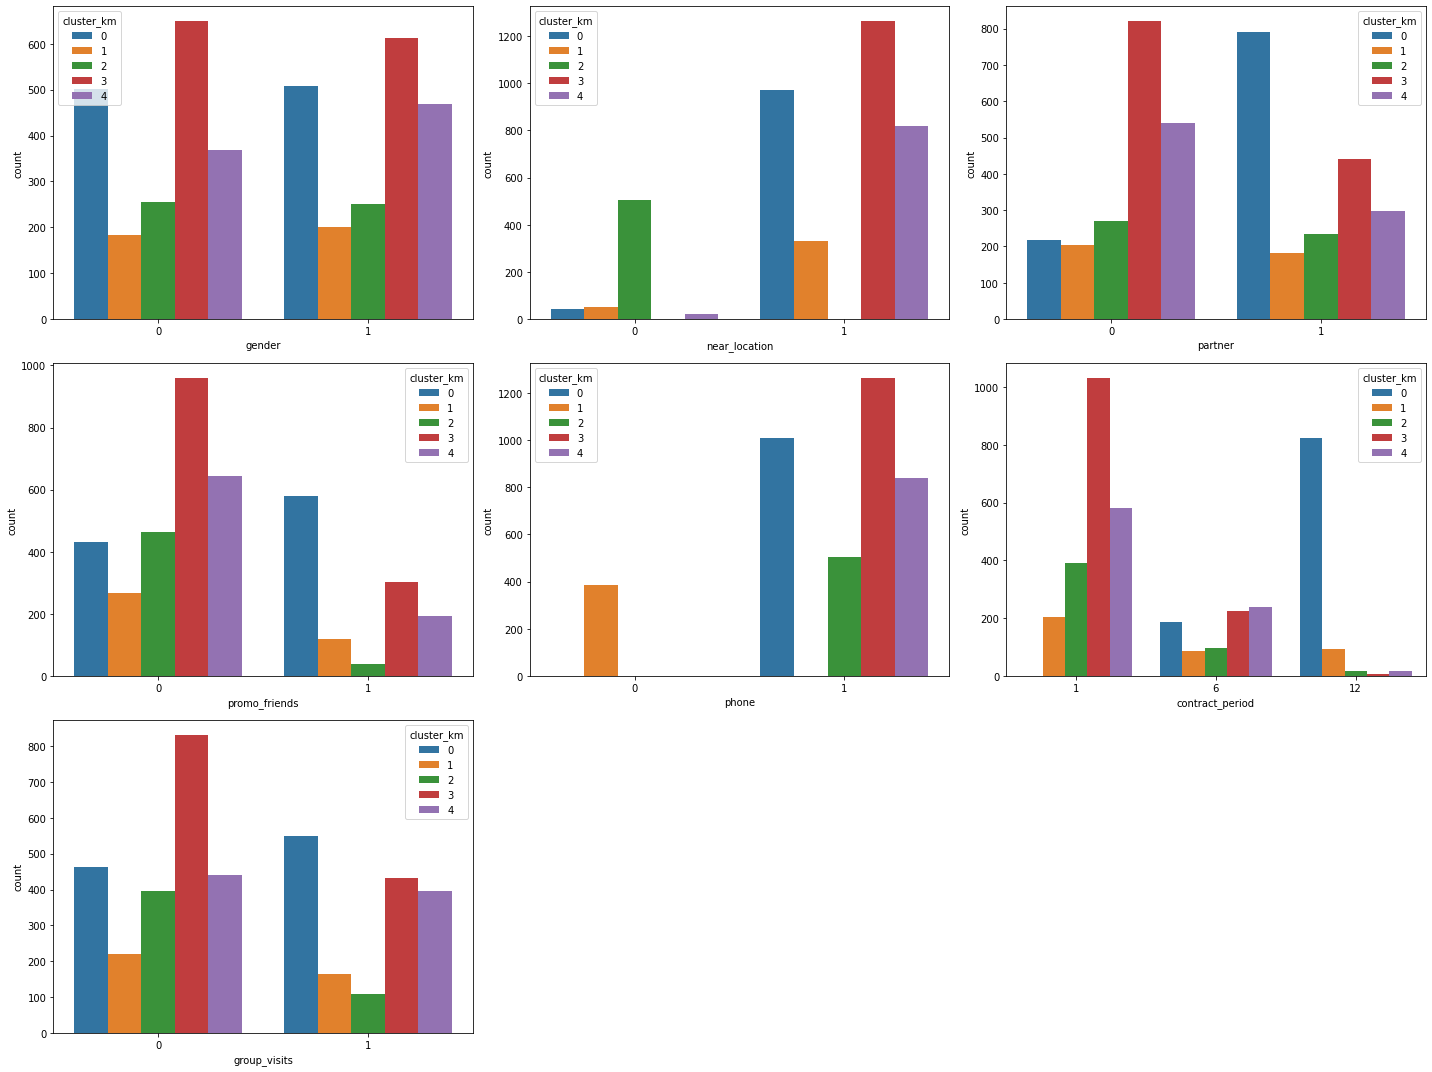

In [64]:
# plotting categorical variables for clusters
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=df, x=col, hue ='cluster_km',
        ax=plt.subplot(3, 3, i + 1),
    )

plt.tight_layout() 
plt.show()

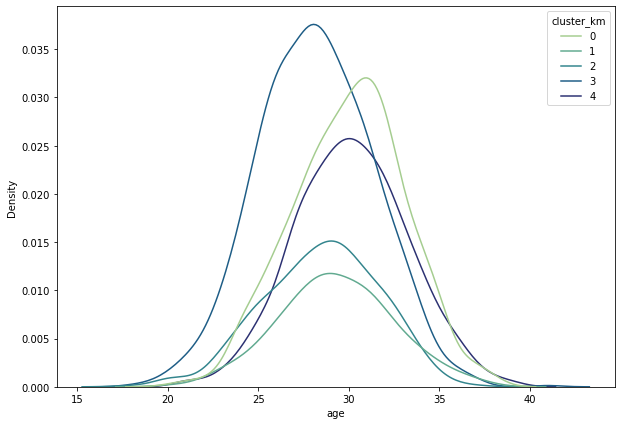

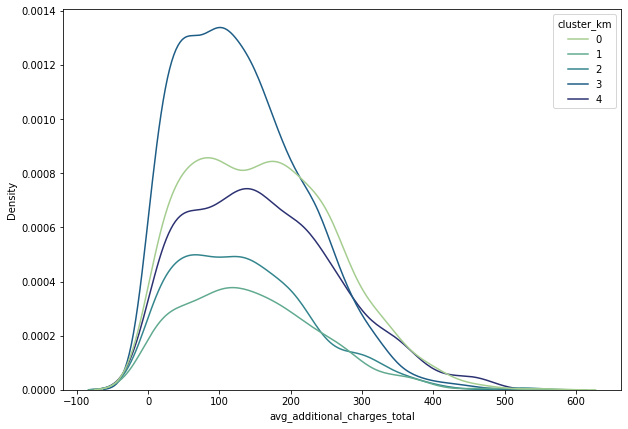

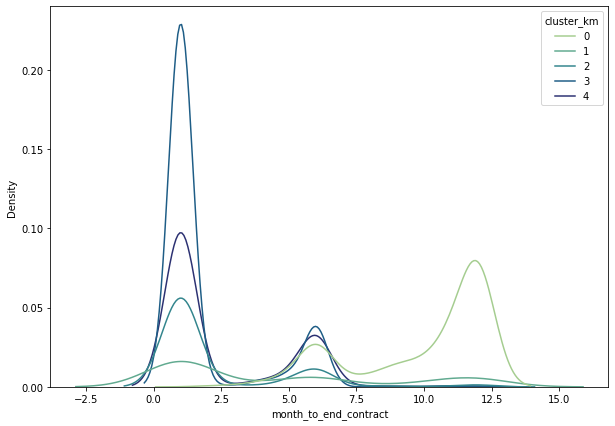

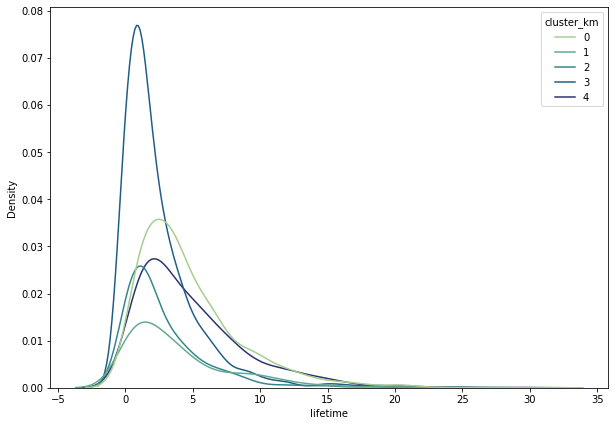

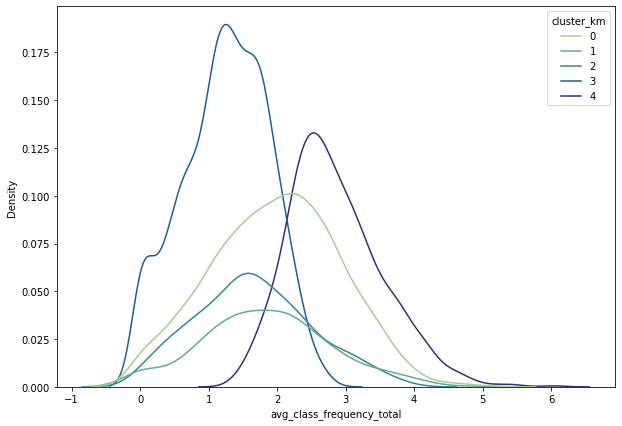

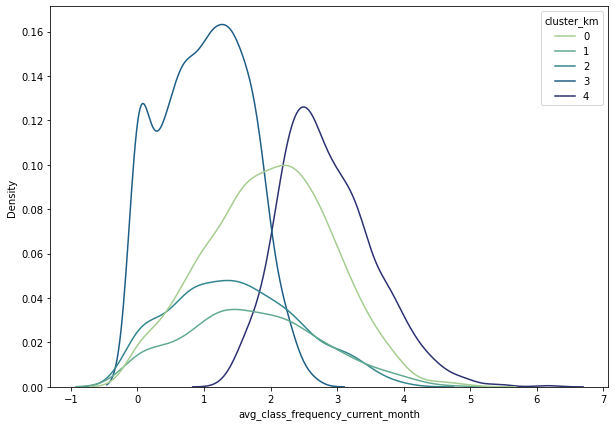

In [65]:
# plotting quantitative variables for clusters
for col in quantitative_cols:
    plt.figure(figsize=(10, 7))
    sns.kdeplot(data = df, x = col, hue='cluster_km', palette="crest",
   )
    plt.show();

# Conclusions and recommendations 

Based on the submitted questionnaires, 5 clusters of clients were formed, for which attributes influencing churn were identified. 

Among the attributes affecting churn, it is important to note the following:
- group_visits. Those who go to group classes are less likely to stop using the gym;
- contract_period. Clients with long contracts are less likely to stop using the gym;
- lifetime. Clients who have been using the club for a long time are less likely to stop using the gym;
- avg_class_frequency_current_month and avg_class_frequency_total. The more often a user went to the gym in the current month, and the more often they go to the gym in general, the less likely they are to go into churn.

It can also be noted that churn is not influenced by the gender and age of the customer.

On the basis of the highlighted features influencing churn we can offer the following recommendations for consideration:
- Promote group classes more actively, form promotions / discounts for them.
- Encourage clients to get longer contracts and offer more favorable conditions for such type of contracts.
- Offer favorable renewal terms to increase the lifetime of customers.
- Track users who visit the gym less than 1 time for the current month to find out the reasons, to additionally stimualte them or make a special offer.